# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#analyze">Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction

Real-world data rarely comes clean. Using Python and its libraries, I gathered data from a variety of sources and in a variety of formats, assessed its quality and tidiness, then cleaned it. 
The dataset that I wrangled, analyzed, and visualized is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 

<a id='gather'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import json

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
import requests
import os

In [5]:
# Commented the below code because no more needed, the file is already extracted and stored.
#file_name = 'image_predictions.tsv'

#url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#response = requests.get(url)

#with open(file_name, mode='wb') as file:
#    file.write(response.content)

In [6]:
df_images = pd.read_csv('image_predictions.tsv', sep='\t')
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
# Commented the below code because no more needed, the file is already extracted and stored.
#import tweepy

#consumer_key = ''
#consumer_secret = ''
#access_token = ''
#access_secret = ''

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
# Commented the below code because no more needed, the file is already extracted and stored.

## References:
## https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
## https://stackoverflow.com/questions/45113594/with-tweepy-how-can-you-get-favorites-and-retweets-on-a-tweet

#import json

## Store all tweet ids in a variable
#t_ids = df_archive.tweet_id

#file_name = 'tweet_json.txt'

## There are tweets corresponding to a few tweet IDs in the archive have been deleted. 
## as it shows this error: [{'code': 144, 'message': 'No status found with that ID.'}]
## So, I used Try-except blocks and printed the deleted tweets IDs. (Reference: https://wiki.python.org/moin/HandlingExceptions)

#with open(file_name, 'w') as file:
#    for tweet_id in  t_ids:
#        try:
#            # Note that setting the tweet_mode parameter to 'extended' in the get_status call, 
#            # i.e., api.get_status(tweet_id, tweet_mode='extended'), can be useful.
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            json.dump(tweet._json, file)
#            file.write('\n')
#        except:
#            print(str(tweet_id) + ' has been deleted.')

In [10]:
file_name = 'tweet_json.txt'

data = []

# Load json file as pythn data dictionary (Reference: https://stackoverflow.com/questions/50653973/how-to-load-a-json-file-in-jupyter-notebook-using-pandas)
with open(file_name, 'r') as file:
    for tweet_json in file:
        tweet = json.loads(tweet_json)
        data.append({'tweet_id': tweet['id_str'], 'retweet_count': tweet['retweet_count'], 'favorite_count': tweet['favorite_count']})

# Creates DataFrame object from dictionary by columns (Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html)        
df_twitter = pd.DataFrame.from_dict(data)
df_twitter.head()

,favorite_count,retweet_count,tweet_id
0,34505,7181,892420643555336193
1,29918,5391,892177421306343426
2,22515,3556,891815181378084864
3,37745,7402,891689557279858688
4,36039,7938,891327558926688256


In [11]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
favorite_count    2328 non-null int64
retweet_count     2328 non-null int64
tweet_id          2328 non-null object
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


<a id='assess'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

In [12]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
df_twitter

,favorite_count,retweet_count,tweet_id
0,34505,7181,892420643555336193
1,29918,5391,892177421306343426
2,22515,3556,891815181378084864
3,37745,7402,891689557279858688
4,36039,7938,891327558926688256
5,18184,2668,891087950875897856
6,10591,1713,890971913173991426
7,58089,16157,890729181411237888
8,25023,3704,890609185150312448
9,28562,6238,890240255349198849


### Programmatic Assessment

#### WeRateDogs Twitter archive data

In [15]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
df_archive.in_reply_to_status_id.notnull().sum()

78

In [18]:
df_archive.retweeted_status_id.notnull().sum()

181

In [19]:
df_archive.duplicated().sum()

0

In [20]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [22]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [23]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [24]:
df_archive[(df_archive.doggo == 'None') & (df_archive.floofer == 'None') & (df_archive.pupper == 'None') & (df_archive.puppo == 'None')].tweet_id.count()

1976

In [25]:
doggo_floofer = df_archive[(df_archive.doggo != 'None') & (df_archive.floofer != 'None')].tweet_id.count() # =1
doggo_pupper = df_archive[(df_archive.doggo != 'None') & (df_archive.pupper != 'None')].tweet_id.count() # =12
doggo_puppo = df_archive[(df_archive.doggo != 'None') & (df_archive.puppo != 'None')].tweet_id.count() # =1
floofer_pupper = df_archive[(df_archive.floofer != 'None') & (df_archive.pupper != 'None')].tweet_id.count() # =0
floofer_puppo = df_archive[(df_archive.floofer != 'None') & (df_archive.puppo != 'None')].tweet_id.count() # =0
pupper_puppo = df_archive[(df_archive.pupper != 'None') & (df_archive.puppo != 'None')].tweet_id.count() # =0

doggo_floofer + doggo_pupper + doggo_puppo + floofer_pupper + floofer_puppo + pupper_puppo

14

In [26]:
df_archive.query('rating_denominator == 0').rating_denominator.count()

1

In [27]:
df_archive.query('rating_denominator < rating_numerator').rating_denominator.count()

1451

In [28]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [29]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Tweet Image Prediction

In [30]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
df_images.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [32]:
df_images.duplicated().sum()

0

In [33]:
df_images.jpg_url.duplicated().sum()

66

In [34]:
df_images.jpg_url.isnull().sum()

0

### Additional Tweets Data via the Twitter API

In [35]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
favorite_count    2328 non-null int64
retweet_count     2328 non-null int64
tweet_id          2328 non-null object
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [36]:
df_twitter.isnull().sum()

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

In [37]:
df_twitter.duplicated().sum()

0

In [38]:
df_twitter.tweet_id.duplicated().sum()

0

### Quality issues

1. There are images for retweets and replies.

2. 'timestamp' and 'tweet_id' columns have the wrong data types.

3. There are 66 duplicated images.

4. Dog categories 'doggo', 'floofer', 'pupper', 'puppo' have string data type that should be boolean.
    - I won't implement this, because of tidiness issue # 1.

5. Some rows have no dog category.

6. There is a row that has a zero 'rating_denominator'.

7. There are unrealistic ratings where the numerator is greater than the denominator.

8. Rating column needed.

9. Tweet Source has an HTML string that is not meaningful.

10. Fourteen records have two dog categories.

11. There are unnecessary columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'.

### Tidiness issues
1. Four variables in four columns in archive table 'doggo', 'floofer', 'pupper', 'puppo'.

2. All data frames should be in one data frame.

<a id='clean'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [39]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_images_clean = df_images.copy()
df_twitter_clean = df_twitter.copy()

### Issue #1:

#### Define:
Delete the retweets and replies in df_archive and their images in df_images.

#### Code

In [40]:
# count the retweets and replies
df_archive_clean.in_reply_to_status_id.notnull().sum() + df_archive_clean.retweeted_status_id.notnull().sum()

259

In [41]:
# Check the original rows number
df_archive_clean.shape[0]

2356

In [42]:
# Store the tweet_id of the retweets and replies. Reference: https://stackoverflow.com/questions/58471161/pandas-get-the-row-id-based-on-condition
ids = df_archive_clean.tweet_id[(df_archive_clean.in_reply_to_status_id.notnull() | df_archive_clean.retweeted_status_id.notnull())].tolist()
len(ids)

259

In [43]:
# Count the retweets and replies in df_images
df_images_clean[df_images_clean['tweet_id'].isin(ids)].tweet_id.count()

104

In [44]:
# Check the rows number before in df_images
df_images_clean.shape[0]

2075

In [45]:
# Drop the rows in df_archive. Reference: https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame/44548976
df_archive_clean = df_archive_clean[~df_archive_clean.in_reply_to_status_id.notnull()]
df_archive_clean = df_archive_clean[~df_archive_clean.retweeted_status_id.notnull()]

In [46]:
# Drop the rows that have the same tweet_id in df_images
df_images_clean = df_images_clean[~df_images_clean['tweet_id'].isin(ids)]

#### Test

In [47]:
# Count the retweets and replies. It should be 0
df_archive_clean.in_reply_to_status_id.notnull().sum() + df_archive_clean.retweeted_status_id.notnull().sum()

0

In [48]:
# Check the rows number after deleting the replies and retweets
# 2356 - 259 = 2097, it should have 2097 rows
df_archive_clean.shape[0]

2097

In [49]:
# Check the rows number after in df_images
# 2075 - 104 = 1971 (should be 1971)
df_images_clean.shape[0]

1971

### Issue #2:

#### Define
Change the tweet_id data type from integer to string in df_archive and df_images, and timestamp from string to datetime in df_archive.

#### Code

In [50]:
# Check data types before 
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [51]:
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1971 non-null int64
jpg_url     1971 non-null object
img_num     1971 non-null int64
p1          1971 non-null object
p1_conf     1971 non-null float64
p1_dog      1971 non-null bool
p2          1971 non-null object
p2_conf     1971 non-null float64
p2_dog      1971 non-null bool
p3          1971 non-null object
p3_conf     1971 non-null float64
p3_dog      1971 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


In [52]:
# Convert the 'tweet_id' column to string using astype(str) function
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_images_clean['tweet_id'] = df_images_clean['tweet_id'].astype(str)

# Convert the 'timestamp' column to datetime using to_datetime() function
df_archive_clean['timestamp']= pd.to_datetime(df_archive_clean['timestamp'])

#### Test

In [53]:
# Check data types after (tweet_id is object and timestamp is datetime) 
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

In [54]:
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1971 non-null object
jpg_url     1971 non-null object
img_num     1971 non-null int64
p1          1971 non-null object
p1_conf     1971 non-null float64
p1_dog      1971 non-null bool
p2          1971 non-null object
p2_conf     1971 non-null float64
p2_dog      1971 non-null bool
p3          1971 non-null object
p3_conf     1971 non-null float64
p3_dog      1971 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


### Issue #3:

#### Define
Delete duplicate images.

#### Code

In [55]:
# Count duplicate
df_images_clean.jpg_url.duplicated().sum()

0

In [56]:
# Drop duplicates using drop_duplicates() function
# Reference: https://www.datacamp.com/community/tutorials/pandas-drop-duplicates?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9077094&gclid=CjwKCAjwp_GJBhBmEiwALWBQk1zF-PfzR6276B1T2zGR-4qawVgjRPFVDUw-3FZ0TNknbvBmVsQudxoCgewQAvD_BwE
df_images_clean = df_images_clean.drop_duplicates(subset=['jpg_url'])

#### Test

In [57]:
# Count duplicate (should be 0)
df_images_clean.jpg_url.duplicated().sum()

0

### Issue #4:

#### Define
Ratings:
- Fix the row with zero 'rating_denominator' --> it was dropped so no need.
- Fix the unrealistic ratings where the numerator is greater than the denominator.
- Create 'rating' column

#### Code

In [58]:
# Check the rows that have the rating's numerator is greater than the rating's denominator.
df_archive_clean.query('rating_denominator < rating_numerator').tweet_id.count()

1239

In [59]:
# I believe that the numerator should be equal to the denominator, since people just exaggerated.

# Store indexes of these rows. Reference: https://stackoverflow.com/questions/58471161/pandas-get-the-row-id-based-on-condition
ids = df_archive_clean.index[df_archive_clean['rating_denominator'] < df_archive_clean['rating_numerator']].tolist()

# Replace the numerator with the denominator
for tweet in ids:
    denominator = df_archive_clean.at[tweet, 'rating_denominator']
    df_archive_clean.at[tweet, 'rating_numerator'] = denominator

In [60]:
# Create 'rating' column
df_archive_clean['rating'] = None

# Fill the rating column with the rating_numerator/rating_denominator
for ind in df_archive_clean.index:
    denominator = df_archive_clean.at[ind, 'rating_denominator']
    numerator = df_archive_clean.at[ind, 'rating_numerator']
    df_archive_clean.at[ind, 'rating'] = numerator/denominator

#### Test

In [61]:
# Check the rows that have the rating's numerator is greater than the rating's denominator. (should be 0)
df_archive_clean.query('rating_denominator < rating_numerator').tweet_id.count()

0

In [62]:
# Check the rating column
df_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
2220,668484198282485761,NaN,NaN,2015-11-22 17:40:27,"<a href=""http://twitter.com/download/iphone"" r...",Good teamwork between these dogs. One is on lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668484198...,9,10,None,None,None,None,None,0.9
1010,747461612269887489,NaN,NaN,2016-06-27 16:08:30,"<a href=""http://twitter.com/download/iphone"" r...",Never seen a shark hold another shark like thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747461612...,10,10,None,None,None,None,None,1
2297,667073648344346624,NaN,NaN,2015-11-18 20:15:26,"<a href=""http://twitter.com/download/iphone"" r...",Here is Dave. He is actually just a skinny leg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667073648...,10,10,Dave,None,None,None,None,1
1828,676263575653122048,NaN,NaN,2015-12-14 04:52:55,"<a href=""http://twitter.com/download/iphone"" r...",All this pupper wanted to do was go skiing. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676263575...,10,10,None,None,None,pupper,None,1
1543,689557536375177216,NaN,NaN,2016-01-19 21:18:22,"<a href=""http://twitter.com/download/iphone"" r...",Downright majestic af 12/10 https://t.co/WFh2F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689557536...,10,10,None,None,None,None,None,1


### Issue #5:

#### Define
Replace the tweet source HTML string with the HTML content to be meaningful.

#### Code

In [63]:
# Check the 'source' column values (html string)
df_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [64]:
# Replace the html string with its content (meaningful strings) using replace() function
df_archive_clean.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone',
                                 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine',
                                 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
                                 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'},
                                inplace=True)

#### Test

In [65]:
# Check the 'source' column values (meaningful string)
df_archive_clean.source.value_counts()

Twitter for iPhone    1964
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

### Issue #6:

#### Define
Delete the rows that have 2 dog categories.

#### Code

In [66]:
# Count the rows that have 2 dog categories

doggo_floofer = df_archive_clean[(df_archive_clean.doggo != 'None') & (df_archive_clean.floofer != 'None')].tweet_id.count() # =1
doggo_pupper = df_archive_clean[(df_archive_clean.doggo != 'None') & (df_archive_clean.pupper != 'None')].tweet_id.count() # =9
doggo_puppo = df_archive_clean[(df_archive_clean.doggo != 'None') & (df_archive_clean.puppo != 'None')].tweet_id.count() # =1
floofer_pupper = df_archive_clean[(df_archive_clean.floofer != 'None') & (df_archive_clean.pupper != 'None')].tweet_id.count() # =0
floofer_puppo = df_archive_clean[(df_archive_clean.floofer != 'None') & (df_archive_clean.puppo != 'None')].tweet_id.count() # =0
pupper_puppo = df_archive_clean[(df_archive_clean.pupper != 'None') & (df_archive_clean.puppo != 'None')].tweet_id.count() # =0

doggo_floofer + doggo_pupper + doggo_puppo + floofer_pupper + floofer_puppo + pupper_puppo

11

In [67]:
# Store indexes of these rows. Reference: https://stackoverflow.com/questions/58471161/pandas-get-the-row-id-based-on-condition
ids = df_archive_clean.index[((df_archive_clean.doggo != 'None') & (df_archive_clean.floofer != 'None')) | ((df_archive_clean.doggo != 'None') & (df_archive_clean.pupper != 'None')) | ((df_archive_clean.doggo != 'None') & (df_archive_clean.puppo != 'None'))].tolist()

# Drop the rows.
df_archive_clean.drop(ids, inplace=True)

#### Test

In [68]:
# Count the rows that have 2 dog categories (should be 0)

doggo_floofer = df_archive_clean[(df_archive_clean.doggo != 'None') & (df_archive_clean.floofer != 'None')].tweet_id.count() # =1
doggo_pupper = df_archive_clean[(df_archive_clean.doggo != 'None') & (df_archive_clean.pupper != 'None')].tweet_id.count() # =9
doggo_puppo = df_archive_clean[(df_archive_clean.doggo != 'None') & (df_archive_clean.puppo != 'None')].tweet_id.count() # =1
floofer_pupper = df_archive_clean[(df_archive_clean.floofer != 'None') & (df_archive_clean.pupper != 'None')].tweet_id.count() # =0
floofer_puppo = df_archive_clean[(df_archive_clean.floofer != 'None') & (df_archive_clean.puppo != 'None')].tweet_id.count() # =0
pupper_puppo = df_archive_clean[(df_archive_clean.pupper != 'None') & (df_archive_clean.puppo != 'None')].tweet_id.count() # =0

doggo_floofer + doggo_pupper + doggo_puppo + floofer_pupper + floofer_puppo + pupper_puppo

0

### Issue #7:

#### Define
Delete unnecessary columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'.

#### Code

In [69]:
# Drop the unnecessary columns using .drop() function
df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis='columns', inplace=True)

#### Test

In [70]:
# Check the columns of the dataframe
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2086 non-null object
timestamp             2086 non-null datetime64[ns]
source                2086 non-null object
text                  2086 non-null object
expanded_urls         2083 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
doggo                 2086 non-null object
floofer               2086 non-null object
pupper                2086 non-null object
puppo                 2086 non-null object
rating                2086 non-null object
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 228.2+ KB


### Issue #8:

#### Define
- Combine the 'doggo', 'floofer', 'pupper', and 'puppo' columns to a one column 'dog_category'.
- Impute the rows that have no dog categories with the 'Unknown' category.

#### Code

In [71]:
# Create the 'dog_category' column
df_archive_clean['dog_category'] = None
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2086 non-null object
timestamp             2086 non-null datetime64[ns]
source                2086 non-null object
text                  2086 non-null object
expanded_urls         2083 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
doggo                 2086 non-null object
floofer               2086 non-null object
pupper                2086 non-null object
puppo                 2086 non-null object
rating                2086 non-null object
dog_category          0 non-null object
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 244.5+ KB


In [72]:
# Fill the 'dog_category' column with the appropriate values. Reference:https://stackoverflow.com/questions/44775764/filling-column-with-condition

doggo = (df_archive_clean.doggo != 'None')
floofer = (df_archive_clean.floofer != 'None')
pupper = (df_archive_clean.pupper != 'None')
puppo = (df_archive_clean.puppo != 'None')

df_archive_clean['dog_category'] = df_archive_clean['dog_category'].mask(doggo, 'doggo')
df_archive_clean['dog_category'] = df_archive_clean['dog_category'].mask(floofer, 'floofer')
df_archive_clean['dog_category'] = df_archive_clean['dog_category'].mask(pupper, 'pupper')
df_archive_clean['dog_category'] = df_archive_clean['dog_category'].mask(puppo, 'puppo')

# Drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns using the drop() function
df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis='columns', inplace=True)

In [73]:
# Impute the rows that have no dog categories with the 'Unknown' category.
# Reference: https://jamesrledoux.com/code/imputation
df_archive_clean = df_archive_clean.fillna("Unknown")

#### Test

In [74]:
# Check the dataframe's columns
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2086 non-null object
timestamp             2086 non-null datetime64[ns]
source                2086 non-null object
text                  2086 non-null object
expanded_urls         2086 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
rating                2086 non-null float64
dog_category          2086 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 179.3+ KB


In [75]:
df_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_category
2265,667534815156183040,2015-11-20 02:47:56,Twitter Web Client,"This is Frank (pronounced ""Fronq""). Too many b...",https://twitter.com/dog_rates/status/667534815...,8,10,Frank,0.8,Unknown
1953,673662677122719744,2015-12-07 00:37:52,Twitter for iPhone,This is Kendall. 12/10 would cuddle the hell o...,https://twitter.com/dog_rates/status/673662677...,10,10,Kendall,1.0,Unknown
988,748977405889503236,2016-07-01 20:31:43,Twitter for iPhone,What jokester sent in a pic without a dog in i...,https://twitter.com/dog_rates/status/748977405...,10,10,not,1.0,Unknown
1376,701805642395348998,2016-02-22 16:27:58,Vine,Please pray for this pupper. Nothing wrong wit...,https://vine.co/v/ivV6Y37mH5Z,10,10,None,1.0,pupper
178,857263160327368704,2017-04-26 16:00:39,Twitter for iPhone,This is Oscar and Oliver. Oliver shrunk Oscar....,https://twitter.com/dog_rates/status/857263160...,10,10,Oscar,1.0,Unknown


### Issue #9:

#### Define
Join the df_archive and df_images to df_twitter.

#### Code

In [76]:
# Join the dataframes using merge() function. Reference: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
df_twitter_clean = df_twitter_clean.merge(df_images_clean,on='tweet_id').merge(df_archive_clean,on='tweet_id')

#### Test

In [77]:
# Check the columns
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 1952
Data columns (total 23 columns):
favorite_count        1953 non-null int64
retweet_count         1953 non-null int64
tweet_id              1953 non-null object
jpg_url               1953 non-null object
img_num               1953 non-null int64
p1                    1953 non-null object
p1_conf               1953 non-null float64
p1_dog                1953 non-null bool
p2                    1953 non-null object
p2_conf               1953 non-null float64
p2_dog                1953 non-null bool
p3                    1953 non-null object
p3_conf               1953 non-null float64
p3_dog                1953 non-null bool
timestamp             1953 non-null datetime64[ns]
source                1953 non-null object
text                  1953 non-null object
expanded_urls         1953 non-null object
rating_numerator      1953 non-null int64
rating_denominator    1953 non-null int64
name                  1953 non-nu

In [78]:
df_twitter_clean.sample(5)

,favorite_count,retweet_count,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,...,p3_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_category
551,12527,4393,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,...,False,2016-09-13 16:13:44,Twitter for iPhone,This girl straight up rejected a guy because h...,https://twitter.com/dog_rates/status/775729183...,10,10,None,1.0,Unknown
1373,2786,1071,679132435750195208,https://pbs.twimg.com/media/CWzDWOkXAAAP0k7.jpg,1,Scottish_deerhound,0.194610,True,Irish_wolfhound,0.162855,...,True,2015-12-22 02:52:45,Twitter for iPhone,This is Louis. He's a river dancer. His friend...,https://twitter.com/dog_rates/status/679132435...,10,10,Louis,1.0,Unknown
261,10093,1907,829449946868879360,https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg,1,Labrador_retriever,0.315163,True,golden_retriever,0.153210,...,True,2017-02-08 22:00:52,Twitter for iPhone,Here's a stressed doggo. Had a long day. Many ...,https://twitter.com/dog_rates/status/829449946...,10,10,None,1.0,doggo
1159,3760,1540,691820333922455552,https://pbs.twimg.com/media/CZnW7JGW0AA83mn.jpg,1,minivan,0.332756,False,sports_car,0.129452,...,False,2016-01-26 03:09:55,Twitter for iPhone,This is Brockly. He's an uber driver. Falls as...,https://twitter.com/dog_rates/status/691820333...,8,10,Brockly,0.8,Unknown
1936,67,11,666102155909144576,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,English_setter,0.298617,True,Newfoundland,0.149842,...,True,2015-11-16 03:55:04,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,10,10,None,1.0,Unknown


<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [79]:
df_twitter_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='analyze'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [80]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,favorite_count,retweet_count,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,...,p3_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_category
0,34505,7181,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,...,False,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,1.0,Unknown
1,29918,5391,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,...,True,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,1.0,Unknown
2,22515,3556,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,...,True,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,1.0,Unknown
3,37745,7402,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,...,False,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,1.0,Unknown
4,36039,7938,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,...,True,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,1.0,Unknown


### Insights and Visualization:

1. Twitter for iPhone is the most common source.

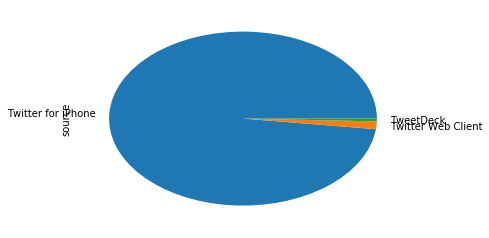

In [89]:
df.source.value_counts().plot(kind='pie');

2. The most common dog category is pupper.

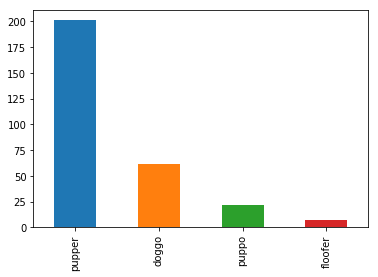

In [82]:
df[~df.dog_category.isin(['Unknown'])].dog_category.value_counts().plot(kind='bar');

3. The most common five dog names are Oliver, 'Cooper', 'Charlie', 'Tucker', and 'Lucy'.

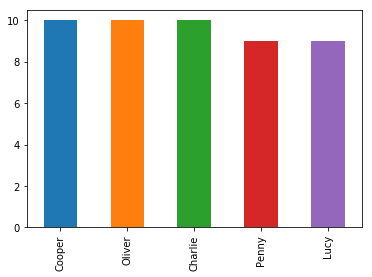

In [83]:
df[~df.name.isin(['None', 'a', 'an'])].name.value_counts().nlargest(5).plot(kind='bar');

4. A Labrador Retriever dog has the most favorite counts.

In [84]:
df[df.favorite_count == df.favorite_count.max()]

,favorite_count,retweet_count,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,...,p3_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_category
754,147979,72615,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,...,True,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,10,10,None,1.0,doggo


5. The minimum rating is 0

In [85]:
df.rating.min()

0.0

6. The favorite_count is usually higher than the retweet_count.

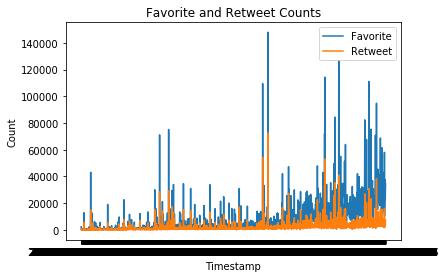

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

fav = df.favorite_count
ret = df.retweet_count
x = df.timestamp
plt.plot(x, fav)
plt.plot(x, ret)
plt.ylabel('Count')
plt.xlabel('Timestamp')
plt.title('Favorite and Retweet Counts')
plt.legend(['Favorite','Retweet'])
plt.show();